# 1. KBO 타자 OPS 예측

## 1.1 문제 정의
### 1.1.1 경진대회 소개

![경진대회소개 이미지](img/1.png)
![경진대회 개요](img/2.png)

![경진대회 배경](img/3.png)

### 1.1.2 평가척도

WRMSE(Weighted Root Mean Squeare Error)
![경진대회 배경](img/4.png)
실제값과 예측값의 차이를 기준으로 평가하므로 오차가 적을수록 좋음.

타석에 들어서지 못한 선수들은 가중치가 0이므로 계산 결과도 0이됨.

![WRMSE 평가 예시](img/5.png)

### 1.1.3 도메인 조사
![분석에 필요한 주요 야구 용어](img/6.png)

## 1.2. 탐색적 데이터 분석

In [1]:
# 필요 라이브러리 로드
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name, size=8)
else:
# Mac 인 경우
    rc('font',family='AppleGothic',size=8)

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
plt.rcParams['axes.unicode_minus'] = False

### 1.2.1. 프리시즌 데이터 분석

In [2]:
# 프리시즌 데이터 로드
preseason_df = pd.read_csv('data/Pre_Season_Batter.csv')
# 정규시즌 데이터 로드
regular_season_df = pd.read_csv('data/Regular_Season_Batter.csv')
# 데이터 크기 확인
print(preseason_df.shape)
# 데이터 상단 출력
preseason_df.head(3)

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.55,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.00,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN


In [3]:
# 데이터 기초통계량 확인
preseason_df.describe()

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


In [4]:
# 정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
regular_count

year
1993      1
1994      2
1995      1
1996      7
1997      8
1998     10
1999     14
2000     20
2001     32
2002     43
2003     54
2004     68
2005     73
2006     85
2007     98
2008    115
2009    124
2010    130
2011    151
2012    174
2013    194
2014    186
2015    207
2016    213
2017    217
2018    227
Name: regular, dtype: int64

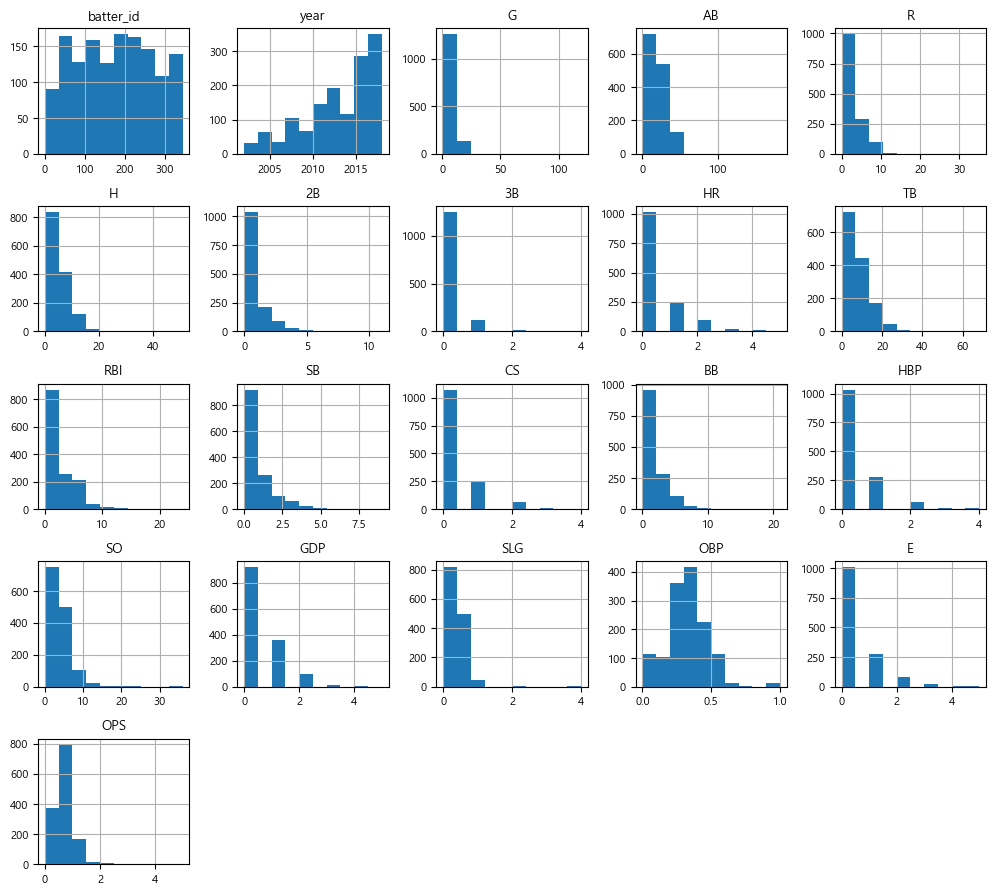

In [5]:
# 데이터 시각화
preseason_df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

In [6]:
# 프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')
preseason_count

year
2002     12
2003     19
2004     28
2005     37
2006     36
2007     43
2008     61
2009     66
2010     72
2011     75
2012     87
2013    104
2014    117
2015    134
2016    153
2017    167
2018    182
Name: preseason, dtype: int64

In [7]:
pd.concat([regular_count, 
           preseason_count,
           np.round(preseason_count/regular_count ,2).rename('ratio')],
          axis=1).T.loc[:,2002:]

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [8]:
#프리시즌 성적과 정규시즌의 성적 간의 상관관계를 살펴보기 위해 두 데이터에 공통적으로 존제하는 선수들의 기록만 정리

# 타자의 이름과 연도를 이용해 새로운 인덱스를 생성
regular_season_df['new_idx'] = regular_season_df['batter_name'] + regular_season_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

In [9]:
# 새로운 인덱스의 교집합
intersection_idx = list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))
len(intersection_idx)

1358

In [10]:
# 교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[regular_season_df['new_idx'].apply(lambda x:x in intersection_idx)].copy()
regular_season_new = regular_season_new.sort_values(by='new_idx').reset_index(drop=True)
regular_season_new.head(2)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2011


In [11]:
# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by='new_idx').reset_index(drop=True)
preseason_new.head(2)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,0.55,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959,가르시아2018
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0.00,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500,강경학2011


In [12]:
# 검정 코드
print(regular_season_new.shape,preseason_new.shape)
sum(regular_season_new['new_idx']==preseason_new['new_idx'])

(1358, 30) (1358, 30)


1358

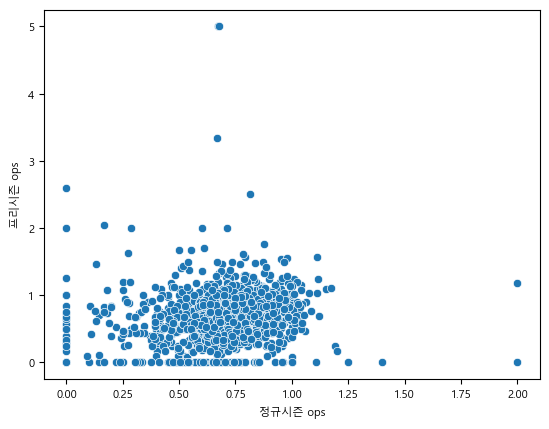

In [13]:
# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
correlation
sns.scatterplot(x=regular_season_new['OPS'],y=preseason_new['OPS'])
plt.xlabel('정규시즌 ops')
plt.ylabel('프리시즌 ops')
plt.show()

### 1.2.2. 정규시즌 데이터 분석

In [14]:
regular_season_df = pd.read_csv('data/Regular_Season_Batter.csv')
regular_season_df.shape

(2454, 29)

In [15]:
regular_season_df.head(2)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000


In [16]:
regular_season_df.describe()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


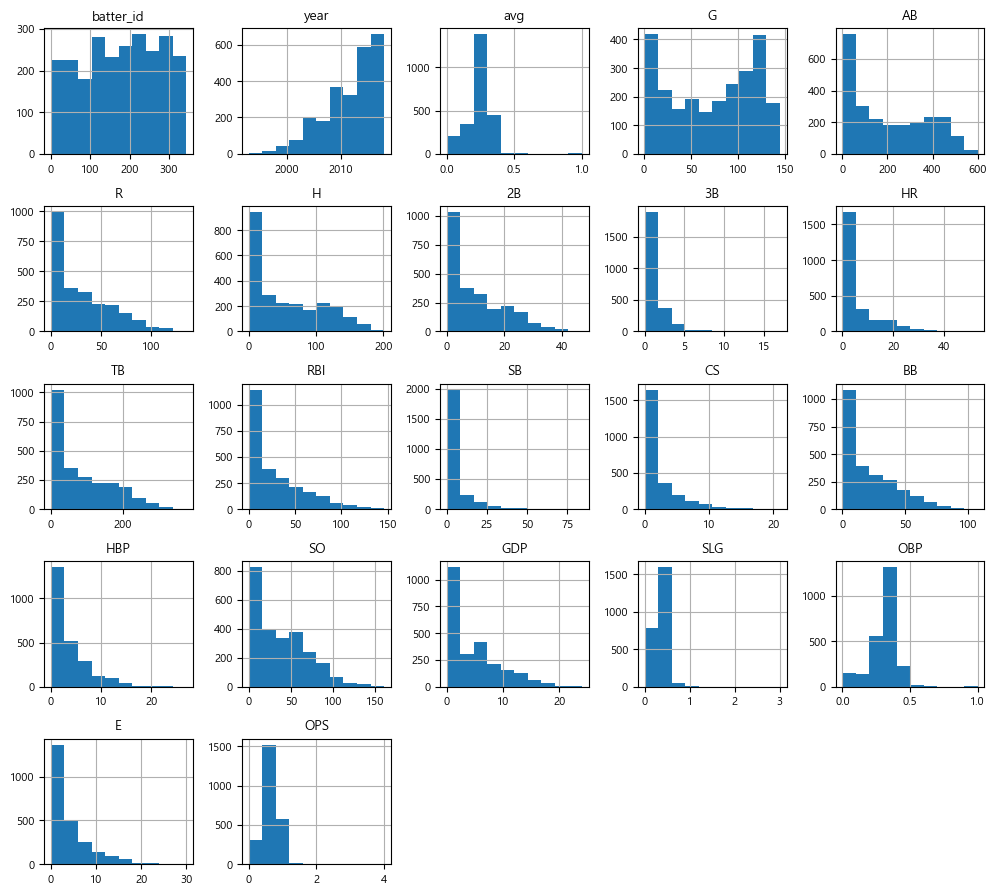

In [17]:
regular_season_df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

<a id='m1'>연도별 OPS 중앙값 그래프</a>

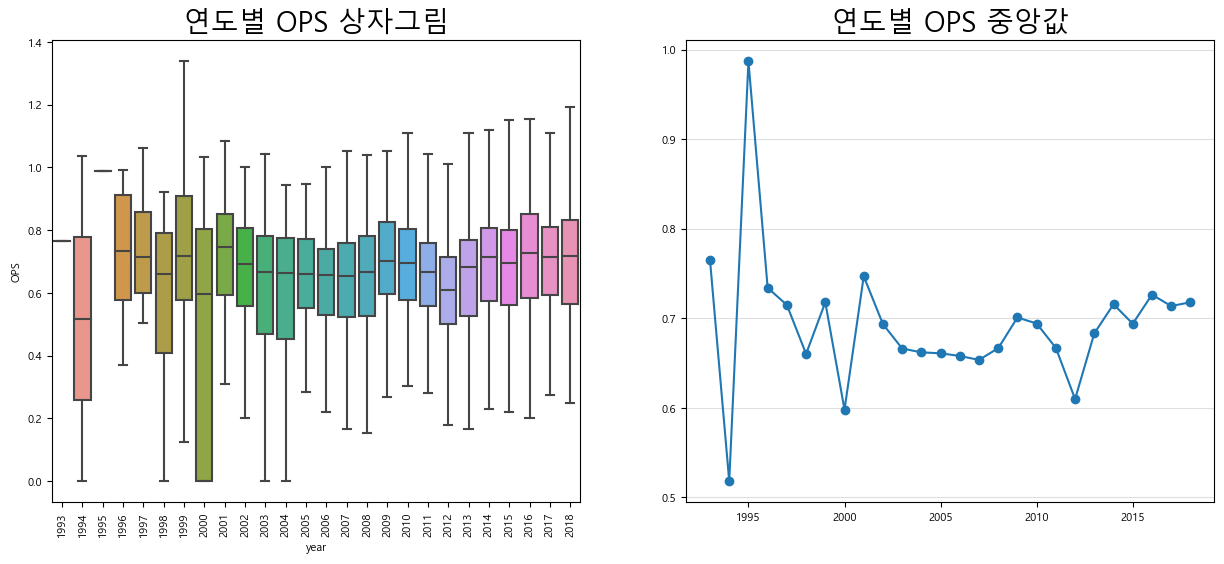

In [18]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
g = sns.boxplot(data=regular_season_df,x='year',y='OPS',showfliers=False)
g.set_title('연도별 OPS 상자그림',size=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
plt.plot(regular_season_df.groupby('year')['OPS'].median(),marker='o')
plt.grid(axis='y',linestyle='-',alpha=0.4)
plt.title('연도별 OPS 중앙값',size=20)

plt.show()

In [19]:
pd.crosstab(regular_season_df['year'],'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


<a id='m2'>연도별 팀 OPS</a>

In [22]:
# 연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index='team',
                                             columns='year',
                                             values='OPS',
                                             aggfunc='median')
med_OPS_team

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
team,,,,,,,,,,,,,,,,,,,,,
KIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849337,0.829906,...,0.707000,0.725000,0.680963,0.615420,0.679763,0.751196,0.598500,0.777000,0.777000,0.7320
KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.643561,0.634500,0.710791,0.6550
LG,NaN,0.000000,NaN,0.476212,0.679836,0.509843,0.637173,0.689250,0.698978,0.645345,...,0.704000,0.677000,0.626000,0.552501,0.653000,0.680809,0.678000,0.729000,0.703000,0.7040
NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.652500,0.636742,0.711000,0.703000,0.705000,0.6000
OB,NaN,NaN,NaN,NaN,0.615797,0.727667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.596491,0.393000,...,0.822977,0.689176,0.710000,0.666953,0.689636,0.751500,0.714000,0.798500,0.764796,0.7685
넥센,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.636166,0.623000,0.589000,0.671000,0.792032,0.753000,0.800500,0.743500,0.7650
두산,NaN,NaN,NaN,NaN,NaN,NaN,0.853830,0.739755,0.695808,0.762809,...,0.701938,0.780000,0.733000,0.660000,0.781500,0.702330,0.760000,0.763000,0.685000,0.8230
롯데,NaN,NaN,NaN,NaN,NaN,NaN,1.124961,0.453390,0.577847,0.577000,...,0.680000,0.653000,0.676715,0.581845,0.600000,0.689000,0.622000,0.704000,0.728000,0.7100


In [23]:
# 2005년 이후에 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:,2005:].isna().sum(axis=1) <= 0 
team_idx

team
KIA      True
KT      False
LG       True
NC      False
OB      False
SK       True
넥센      False
두산       True
롯데       True
삼성       True
쌍방울     False
우리      False
한화       True
해태      False
현대      False
히어로즈    False
dtype: bool

In [24]:
med_OPS_team.loc[team_idx,2005:].T

team,KIA,LG,SK,두산,롯데,삼성,한화
year,,,,,,,
2005,0.583333,0.657000,0.601000,0.699575,0.673000,0.741419,0.577151
2006,0.717176,0.593128,0.682591,0.639750,0.586748,0.734067,0.624351
2007,0.546944,0.661500,0.774000,0.656000,0.629000,0.602000,0.665602
2008,0.644474,0.622015,0.693000,0.702000,0.725455,0.681104,0.562049
2009,0.707000,0.704000,0.822977,0.701938,0.680000,0.694336,0.672000
2010,0.725000,0.677000,0.689176,0.780000,0.653000,0.771000,0.628597
2011,0.680963,0.626000,0.710000,0.733000,0.676715,0.677606,0.649190
2012,0.615420,0.552501,0.666953,0.660000,0.581845,0.614071,0.583929
2013,0.679763,0.653000,0.689636,0.781500,0.600000,0.721250,0.616000


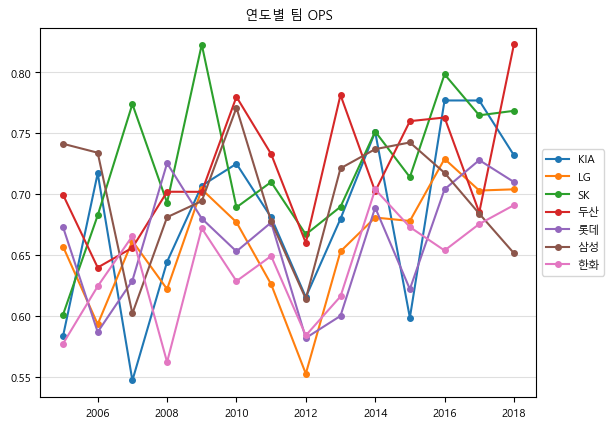

In [25]:
plt.plot(med_OPS_team.loc[team_idx,2005:].T, marker='o', markersize=4)
plt.grid(axis='y',linestyle='-',alpha=0.4)
plt.legend(med_OPS_team.loc[team_idx,2005:].T.columns,loc='center left',bbox_to_anchor=(1,0.5))
plt.title('연도별 팀 OPS')
plt.show()

In [26]:
import re

regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x : int(re.findall('\d+',x.split('/')[1])[0]) if pd.notnull(x) else x)

regular_season_df['height'] = regular_season_df['height/weight'].apply(
    lambda x : int(re.findall('\d+',x.split('/')[0])[0]) if pd.notnull(x) else x)

print(regular_season_df['height/weight'][0],regular_season_df['height'][0],regular_season_df['weight'][0])

177cm/93kg 177.0 93.0


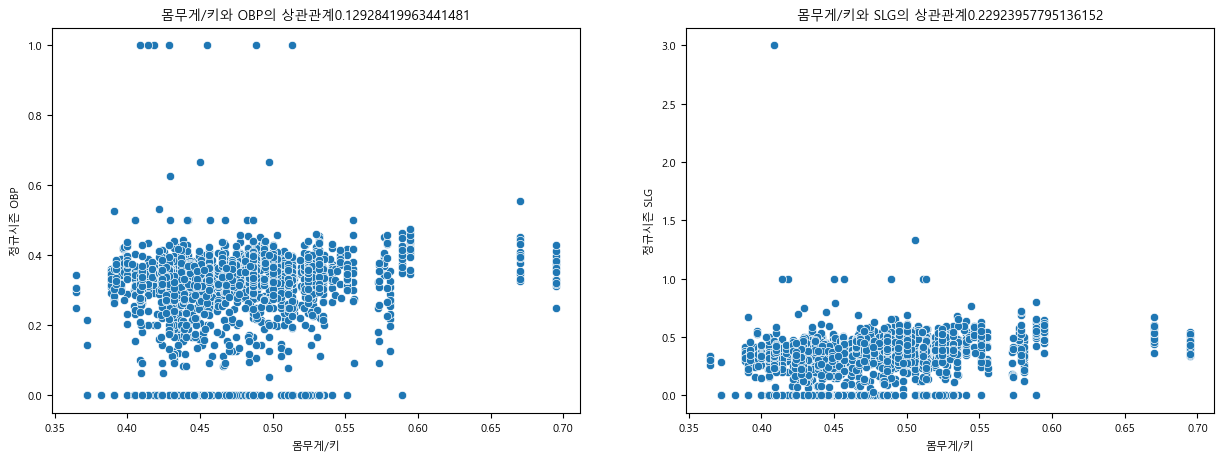

In [27]:
# 몸무게/키 계산
regular_season_df['weight_per_height'] = regular_season_df['weight']/regular_season_df['height']

plt.figure(figsize=(15,5))

# 몸무게/키와 OBP의 상관관계 계산
plt.subplot(1,2,1)
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(data=regular_season_df,x='weight_per_height',y='OBP')
plt.title('몸무게/키와 OBP의 상관관계'+str(correlation))
plt.ylabel('정규시즌 OBP')
plt.xlabel('몸무게/키')

# 몸무게/키와 SLG의 상관관계 계산
plt.subplot(1,2,2)
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(data=regular_season_df,x='weight_per_height',y='SLG')
plt.title('몸무게/키와 SLG의 상관관계'+str(correlation))
plt.ylabel('정규시즌 SLG')
plt.xlabel('몸무게/키')
plt.show()

In [29]:
regular_season_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [32]:
# position
regular_season_df['pos'] = regular_season_df['position'].apply(
    lambda x : x.split('(')[0] if pd.notnull(x) else x)

# 우타, 좌타, 양타
regular_season_df['hit_way'] = regular_season_df['position'].apply(
    lambda x : x[-3:-1] if pd.notnull(x) else x)

print(regular_season_df['position'][0],
      regular_season_df['pos'][0],
      regular_season_df['hit_way'][0]
     )

내야수(우투우타) 내야수 우타


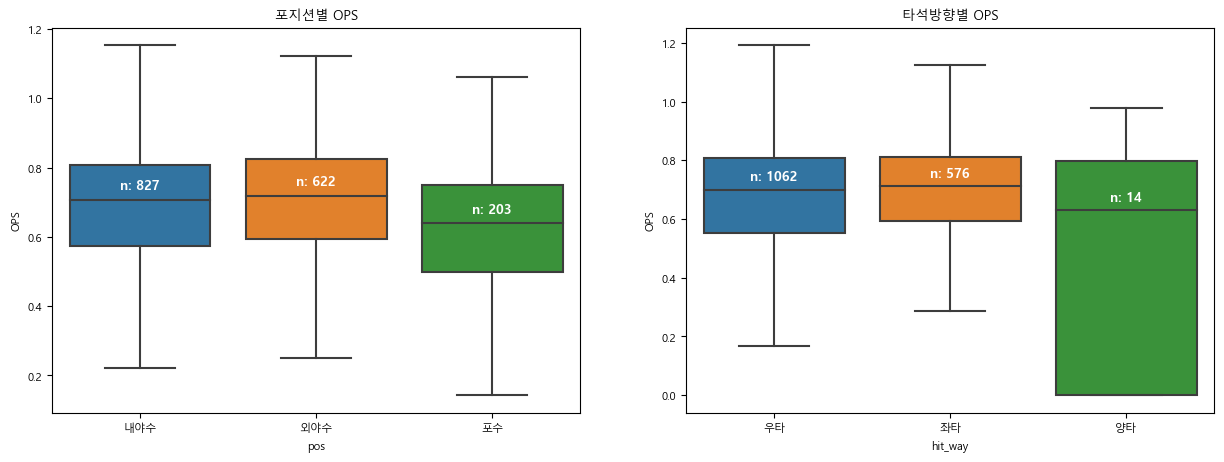

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.boxplot(data=regular_season_df,
                 x='pos',
                 y='OPS',
                 showfliers=False)

medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()
nobs = regular_season_df['pos'].value_counts().to_dict()
for key in nobs: nobs[key] = 'n: '+ str(nobs[key])
xticks_labels = [ item.get_text() for item in ax.get_xticklabels()]
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()),
            medians[label.get_text()] + 0.03,
            nobs[label.get_text()],
            horizontalalignment='center',
            size='large',
            color='w',
            weight='semibold')
ax.set_title('포지션별 OPS')

plt.subplot(1,2,2)
ax = sns.boxplot(data=regular_season_df,
                 x='hit_way',
                 y='OPS',
                 showfliers=False)

medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()
nobs = regular_season_df['hit_way'].value_counts().to_dict()
for key in nobs: nobs[key] = 'n: '+ str(nobs[key])
xticks_labels = [ item.get_text() for item in ax.get_xticklabels()]
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()),
            medians[label.get_text()] + 0.03,
            nobs[label.get_text()],
            horizontalalignment='center',
            size='large',
            color='w',
            weight='semibold')
ax.set_title('타석방향별 OPS')

plt.show()

In [47]:
regular_season_df['career']

0       쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                            광주대성초-광주동성중-광주동성고
2                            광주대성초-광주동성중-광주동성고
3                            광주대성초-광주동성중-광주동성고
4                            광주대성초-광주동성중-광주동성고
                         ...                  
2449                               석천초-대헌중-공주고
2450                               석천초-대헌중-공주고
2451                               석천초-대헌중-공주고
2452                               석천초-대헌중-공주고
2453                               석천초-대헌중-공주고
Name: career, Length: 2454, dtype: object

In [56]:
# career를 split
foreign_country = regular_season_df['career'].apply(
    lambda x : x.replace('-', ' ').split()[0])
# 외국만 추출
foreign_country_list = list(set(foreign_country.apply(lambda x : np.nan if '초' in x else x)))
# 결측치 처리
foreign_country_list = [ x for x in foreign_country_list if str(x) != 'nan']

In [59]:
regular_season_df['country'] = foreign_country
regular_season_df['country'] = regular_season_df['country'].apply(
        lambda x : x if pd.isnull(x) 
                     else ( 'foreign' if x in foreign_country_list 
                                      else'korean')
)
regular_season_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


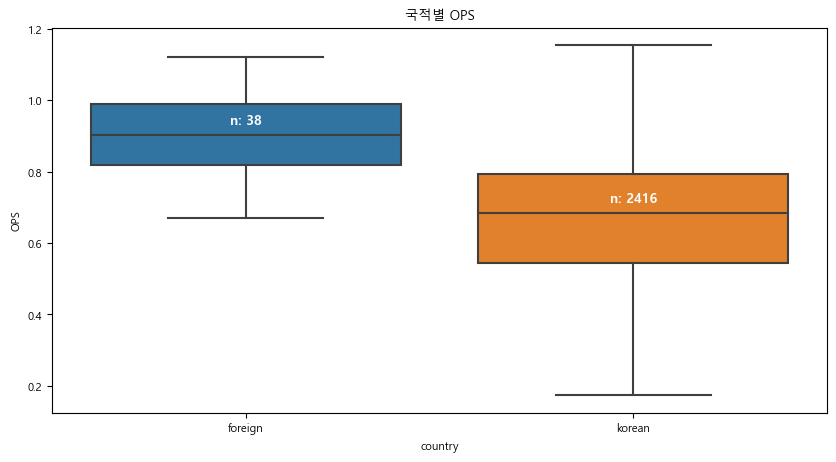

In [62]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=regular_season_df,
                 x='country',
                 y='OPS',
                 showfliers=False)
medians = regular_season_df.groupby(['country'])['OPS'].median().to_dict()
nobs = regular_season_df['country'].value_counts().to_dict()
for key in nobs: nobs[key] = 'n: '+str(nobs[key])
xticks_labels = [ item.get_text() for item in ax.get_xticklabels()]
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()),
            medians[label.get_text()] + 0.03,
            nobs[label.get_text()],
            horizontalalignment='center',
            size='large',
            color='w',
            weight='semibold')
ax.set_title('국적별 OPS')
plt.show()

In [64]:
regular_season_df['starting_salary'].value_counts()

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
4000만원       62
12000만원      62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
33000만원      10
6500만원       10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

In [65]:
# 결측치라면 그대로 0으로 두고 ‘만원’이 포함되어 있다면 숫자만 뽑아서 초봉으로 넣어준다. 그외 만 원 단위가 아닌 초봉은 결측치로 처리한다.
regular_season_df['starting_salary'] = regular_season_df['starting_salary'].apply(
    lambda x :  x  if pd.isnull(x) 
                   else( int(re.findall('\d+',x)[0]) if '만원' in x 
                                                     else np.nan) 
)
regular_season_df['starting_salary']

0           NaN
1       10000.0
2       10000.0
3       10000.0
4       10000.0
         ...   
2449     4000.0
2450     4000.0
2451     4000.0
2452     4000.0
2453     4000.0
Name: starting_salary, Length: 2454, dtype: float64

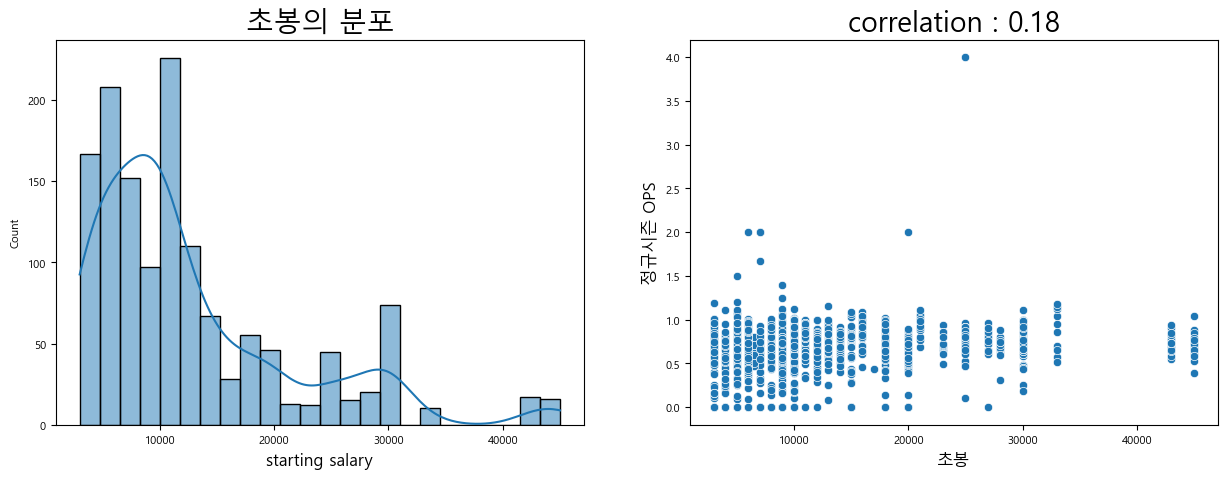

In [74]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
# b = sns.distplot(regular_season_df['starting_salary'].loc[regular_season_df['starting_salary'].notnull()],
#                  hist=True)
b = sns.histplot(regular_season_df['starting_salary'].loc[regular_season_df['starting_salary'].notnull()],
                kde=True) 
b.set_xlabel('starting salary',fontsize=12)
b.set_title('초봉의 분포',fontsize=20)

plt.subplot(1,2,2)
correlation = regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b = sns.scatterplot(data=regular_season_df,
                    x='starting_salary',
                    y='OPS')
b.set_ylabel('정규시즌 OPS',fontsize=12)
b.set_xlabel('초봉',fontsize=12)
b.axes.set_title('correlation : ' + str(np.round(correlation,2)),
                fontsize=20)
plt.show()

### 1.2.3. 일별 데이터 분석

In [77]:
day_by_day_df = pd.read_csv('data/Regular_Season_Batter_Day_by_Day_b4.csv')
day_by_day_df.head()

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [78]:
day_by_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112273 entries, 0 to 112272
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   batter_id      112273 non-null  int64  
 1   batter_name    112273 non-null  object 
 2   date           112273 non-null  float64
 3   opposing_team  112273 non-null  object 
 4   avg1           112273 non-null  object 
 5   AB             112273 non-null  int64  
 6   R              112273 non-null  int64  
 7   H              112273 non-null  int64  
 8   2B             112273 non-null  int64  
 9   3B             112273 non-null  int64  
 10  HR             112273 non-null  int64  
 11  RBI            112273 non-null  int64  
 12  SB             112273 non-null  int64  
 13  CS             112273 non-null  int64  
 14  BB             112273 non-null  int64  
 15  HBP            112273 non-null  int64  
 16  SO             112273 non-null  int64  
 17  GDP            112273 non-nul

In [85]:
# 날짜(date)를 ‘.’을 기준으로 나누고 첫 번째 값을 월(month)로 지정 
day_by_day_df['month'] = day_by_day_df['date'].apply(
    lambda x : str(x).split('.')[0])

# 각 연도의 월별 평균 누적 타율(avg2) 계산
agg_df = day_by_day_df.groupby(['year','month'])['avg2'].mean().reset_index()

# pivot_table을 이용해 데이터 변형
agg_df = agg_df.pivot_table(index='month',columns='year',values='avg2')
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


<a id='m3'>연도별 월 평균 타율</a>

In [86]:
agg_df.iloc[2:,10:]

year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
4,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


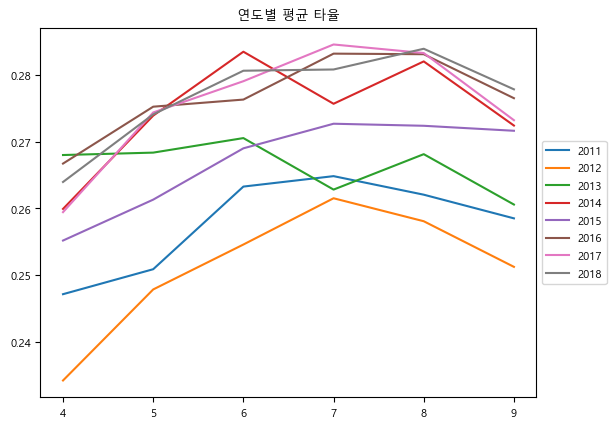

In [90]:
plt.plot(agg_df.iloc[2:,10:])
plt.legend(agg_df.iloc[2:,10:].columns,
           loc='center left',
           bbox_to_anchor=(1,0.5))
plt.title('연도별 평균 타율')
plt.show()

## 1.3. 데이터 전처리

In [92]:
pd.DataFrame(regular_season_df.isna().sum()).T

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,0,0,0,26,0,0,0,0,0,...,802,0,1076,26,802,802,802,802,802,0


In [101]:
# 수치형 타입의 변수 저장
numerics = ['int16','int32','int64','float16','float32','float64']
num_cols = regular_season_df.select_dtypes(include=numerics).columns

# 수치형 타입 변수 중 결측치가 하나라도 존재하는 행 출력
# isna().sum(axis=1) -> 열 기준의 결측치 개수
# df.loc[]를 통해 결측치 0개 이상 데이터를 추출
regular_season_df.loc[regular_season_df[num_cols].isna().sum(axis=1)>0,num_cols].head()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SO,GDP,SLG,OBP,E,starting_salary,OPS,weight,height,weight_per_height
0,0,2018,0.339,50,183,27,62,9,0,8,...,25,3,0.519000,0.383000,9,NaN,0.902000,93.0,177.0,0.525424
12,138,2005,0.127,39,63,9,8,2,0,0,...,15,1,0.158730,0.256757,3,NaN,0.415487,NaN,NaN,NaN
13,138,2006,0.139,37,36,6,5,2,0,0,...,14,0,0.194444,0.326087,4,NaN,0.520531,NaN,NaN,NaN
14,138,2007,0.000,8,4,3,0,0,0,0,...,2,1,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN
15,138,2008,0.000,2,1,0,0,0,0,0,...,0,0,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN


In [100]:
regular_season_df[num_cols].isna().sum(axis=1)

0       1
1       0
2       0
3       0
4       0
       ..
2449    0
2450    0
2451    0
2452    0
2453    0
Length: 2454, dtype: int64

In [103]:
# 정규 시즌 데이터에서 결측치를 0으로 채우기
regular_season_df[regular_season_df.select_dtypes(include=numerics).columns] = \
regular_season_df[regular_season_df.select_dtypes(include=numerics).columns].fillna(0) 
regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.000,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.761,82.0,181.0,0.453039,내야수,양타,korean


In [104]:
regular_season_df.isnull().sum()

batter_id              0
batter_name            0
year                   0
team                   0
avg                    0
G                      0
AB                     0
R                      0
H                      0
2B                     0
3B                     0
HR                     0
TB                     0
RBI                    0
SB                     0
CS                     0
BB                     0
HBP                    0
SO                     0
GDP                    0
SLG                    0
OBP                    0
E                      0
height/weight        802
year_born              0
position             802
career                 0
starting_salary        0
OPS                    0
weight                 0
height                 0
weight_per_height      0
pos                  802
hit_way              802
country                0
dtype: int64

In [106]:
# 일별 데이터에서 결측치를 0으로 채우기
day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns].isna().sum()

batter_id    0
date         0
AB           0
R            0
H            0
2B           0
3B           0
HR           0
RBI          0
SB           0
CS           0
BB           0
HBP          0
SO           0
GDP          0
avg2         0
year         0
dtype: int64

In [108]:
# 프리시즌 데이터에서 결측치를 0으로 채우기
# preseason_df.isna().sum()
preseason_df[preseason_df.select_dtypes(include=numerics).columns] = \
preseason_df[preseason_df.select_dtypes(include=numerics).columns].fillna(0)
preseason_df.isna().sum()

batter_id            0
batter_name          0
year                 0
team                 0
avg                  0
G                    0
AB                   0
R                    0
H                    0
2B                   0
3B                   0
HR                   0
TB                   0
RBI                  0
SB                   0
CS                   0
BB                   0
HBP                  0
SO                   0
GDP                  0
SLG                  0
OBP                  0
E                    0
height/weight        0
year_born            0
position             0
career               0
starting_salary    214
OPS                  0
new_idx              0
dtype: int64

In [110]:
# 수치형이 아닌 변수 추출
not_num_cols = [ x for x in regular_season_df.columns if x not in num_cols]

# 수치형이 아닌 변수 중 결측치가 하나라도 존재하는 행 출력
# isna().sum(axis=1) -> 열 기준의 결측치 개수
# df.loc[]를 통해 결측치 0개 이상 데이터를 추출
regular_season_df.loc[regular_season_df[not_num_cols].isna().sum(axis=1)>0,
                      not_num_cols].head()

,batter_name,team,height/weight,year_born,position,career,pos,hit_way,country
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
16,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean


In [113]:
# 삭제할 데이터 추출
cond1 = ((regular_season_df['H'] > 0) & (regular_season_df['SLG'] == 0))
cond2 = (((regular_season_df['H']>0)|
          (regular_season_df['BB']>0)|
          (regular_season_df['HBP']>0)) &
         (regular_season_df['OBP']==0))

drop_idx = regular_season_df.loc[cond1|cond2].index

# 데이터 삭제
print(regular_season_df.shape)
regular_season_df = regular_season_df.drop(index=drop_idx).reset_index(drop=True)
print(regular_season_df.shape)

(2454, 35)
(2447, 35)


### 1.3.2. 규정 타수 정의

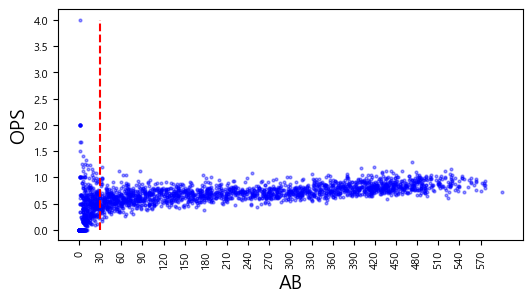

In [118]:
plt.figure(figsize=(6,3))
plt.plot('AB',
         'OPS',
         data=regular_season_df,
         linestyle='none',
         marker='o',
         markersize=2,
         color='blue',
         alpha=0.4)
plt.xlabel('AB',fontsize=14)
plt.ylabel('OPS',fontsize=14)
plt.xticks(list(range(min(regular_season_df['AB']),
                      max(regular_season_df['AB']),
                      30)),
           rotation=90)
plt.vlines(30,
           ymin=min(regular_season_df['OPS']),
           ymax=max(regular_season_df['OPS']),
           linestyle='dashed',colors='r')
plt.show()

In [120]:
# OPS 이상치 탐색을 위한 수치 정의
Q1 = regular_season_df['OPS'].quantile(0.25)
Q2 = regular_season_df['OPS'].quantile(0.75)
IQR = Q2 - Q1

# 실제 OPS 이상치 탐색
cond1 = ((regular_season_df['OPS'] < (Q1 - IQR * 1.5) ) |
         (regular_season_df['OPS'] > (Q2 + IQR * 1.5) ))
regular_season_df.loc[cond1].sort_values(by='AB',
         ascending=False)[['batter_name','AB','year','OPS']].head(10)

,batter_name,AB,year,OPS
2329,테임즈,472,2015,1.293656
97,강정호,418,2014,1.200156
1318,유재신,33,2018,1.192000
416,김원섭,25,2005,0.116923
1543,이여상,22,2013,0.090909
681,문규현,18,2007,0.109000
578,김회성,17,2010,0.105000
1902,정병곤,15,2018,0.130000
1874,정경운,15,2018,0.130000
2384,현재윤,15,2014,1.229167


<a id='m4'>7월 일별 경기수 합</a>

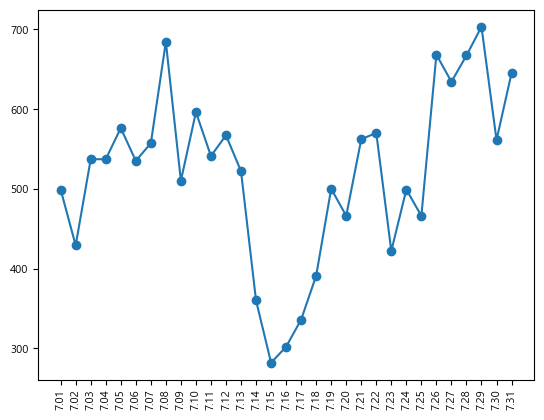

In [122]:
# 7.01~7.31 숫자 생성 후 반 올림
major_ticks = list(np.round(np.linspace(7.01,7.31,31) ,2))
# major_ticks
july = ( day_by_day_df['date'] >= 7 ) & ( day_by_day_df['date'] < 8 )
plt.plot(major_ticks,
         day_by_day_df['date'].loc[july].value_counts().sort_index(), 
         marker='o')
plt.xticks(major_ticks,rotation=90)
plt.show()

### 1.3.3. 시간 변수

In [126]:
# 시간 변수를 생성하는 함수 정의
def lag_function(df,var_name,past):
    # df = 시간변수를 생성할 데이터 프레임
    # var_name = 시간변수 생성의 대상이 되는 변수 이름
    # past = 몇 년 전의 성적을 생성할지 결정(정수형)
    df.reset_index(drop=True,inplace=True)
    df['lag'+str(past)+'_'+var_name] = np.nan
    df['lag'+str(past)+'_'+'AB'] = np.nan
    
    for col in ['AB',var_name]:
        for i in range(max(df.index)+1):
            val = df.loc[(df['batter_name']==df['batter_name'][i]) &
                         (df['year']==df['year'][i]-past),
                        col]
            if len(val) != 0:
                df.loc[i,'lag'+str(past)+'_'+ col] = val.iloc[0]
    df.loc[df['lag'+str(past)+'_'+ 'AB'] < 30,
           'lag'+str(past)+'_'+var_name] = np.nan
    df.drop(columns=['lag'+str(past)+'_'+ 'AB'],inplace=True)
    return df

In [123]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(regular_season_df.select_dtypes(include=numerics).drop(
  columns = ['batter_id','year','OPS','SLG']).columns)
numeric_cols

['avg',
 'G',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'TB',
 'RBI',
 'SB',
 'CS',
 'BB',
 'HBP',
 'SO',
 'GDP',
 'OBP',
 'E',
 'starting_salary',
 'weight',
 'height',
 'weight_per_height']

In [124]:
regular_season_temp =  regular_season_df[numeric_cols+['year','batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_df['AB'] >= 30]
regular_season_temp

,avg,G,AB,R,H,2B,3B,HR,TB,RBI,...,SO,GDP,OBP,E,starting_salary,weight,height,weight_per_height,year,batter_name
0,0.339,50,183,27,62,9,0,8,95,34,...,25,3,0.383000,9,0.0,93.0,177.0,0.525424,2018,가르시아
2,0.221,41,86,11,19,2,3,1,30,7,...,28,1,0.337000,6,10000.0,72.0,180.0,0.400000,2014,강경학
3,0.257,120,311,50,80,7,4,2,101,27,...,58,3,0.348000,15,10000.0,72.0,180.0,0.400000,2015,강경학
4,0.158,46,101,16,16,3,2,1,26,7,...,30,5,0.232000,7,10000.0,72.0,180.0,0.400000,2016,강경학
5,0.214,59,84,17,18,2,1,0,22,4,...,19,1,0.290000,4,10000.0,72.0,180.0,0.400000,2017,강경학
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,0.335,127,498,97,167,26,5,27,284,113,...,66,10,0.394000,15,6000.0,96.0,183.0,0.524590,2016,황재균
2437,0.296,142,530,76,157,41,3,25,279,88,...,120,5,0.358000,17,6000.0,96.0,183.0,0.524590,2018,황재균
2438,0.149,18,47,4,7,0,0,1,10,5,...,15,0,0.298246,1,0.0,0.0,0.0,0.000000,2012,황정립
2439,0.244,21,45,8,11,2,0,1,16,8,...,13,2,0.403509,1,0.0,0.0,0.0,0.000000,2013,황정립


In [128]:
# 시간변수 생성 함수를 통한 지표별 1년 전 성적 추출
for col in numeric_cols:
    regular_season_temp = lag_function(regular_season_temp,col,1)
regular_season_temp

,avg,G,AB,R,H,2B,3B,HR,TB,RBI,...,lag1_BB,lag1_HBP,lag1_SO,lag1_GDP,lag1_OBP,lag1_E,lag1_starting_salary,lag1_weight,lag1_height,lag1_weight_per_height
0,0.339,50,183,27,62,9,0,8,95,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.221,41,86,11,19,2,3,1,30,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.257,120,311,50,80,7,4,2,101,27,...,13.0,2.0,28.0,1.0,0.337000,6.0,10000.0,72.0,180.0,0.40000
3,0.158,46,101,16,16,3,2,1,26,7,...,40.0,5.0,58.0,3.0,0.348000,15.0,10000.0,72.0,180.0,0.40000
4,0.214,59,84,17,18,2,1,0,22,4,...,8.0,2.0,30.0,5.0,0.232000,7.0,10000.0,72.0,180.0,0.40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,0.335,127,498,97,167,26,5,27,284,113,...,48.0,4.0,122.0,14.0,0.350000,16.0,6000.0,96.0,183.0,0.52459
1895,0.296,142,530,76,157,41,3,25,279,88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1896,0.149,18,47,4,7,0,0,1,10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1897,0.244,21,45,8,11,2,0,1,16,8,...,10.0,0.0,15.0,0.0,0.298246,1.0,0.0,0.0,0.0,0.00000


In [130]:
numeric_cols.remove('OBP')

In [131]:
numeric_cols

['avg',
 'G',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'TB',
 'RBI',
 'SB',
 'CS',
 'BB',
 'HBP',
 'SO',
 'GDP',
 'E',
 'starting_salary',
 'weight',
 'height',
 'weight_per_height']

In [134]:
regular_season_temp.drop(columns=numeric_cols,inplace=True)

In [136]:
regular_season_temp.head(2)

,OBP,year,batter_name,lag1_avg,lag1_G,lag1_R,lag1_H,lag1_2B,lag1_3B,lag1_HR,...,lag1_BB,lag1_HBP,lag1_SO,lag1_GDP,lag1_OBP,lag1_E,lag1_starting_salary,lag1_weight,lag1_height,lag1_weight_per_height
0,0.383,2018,가르시아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.337,2014,강경학,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
# 상관관계 도출
corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by='OBP',ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]
corr_matrix

,OBP,lag1_BB,lag1_TB,lag1_RBI,lag1_OBP,lag1_R,lag1_H,lag1_HR,lag1_2B,lag1_avg,...,lag1_HBP,lag1_CS,lag1_SB,lag1_weight,lag1_weight_per_height,lag1_3B,lag1_height,lag1_starting_salary,year,lag1_E
OBP,1.000000,0.522357,0.492322,0.483260,0.475187,0.471261,0.467290,0.438914,0.437424,0.392883,...,0.282853,0.187070,0.162061,0.159897,0.159335,0.135085,0.131954,0.114010,0.091312,0.076340
lag1_BB,0.522357,1.000000,0.847957,0.817842,0.720749,0.840939,0.837736,0.678134,0.761681,0.564350,...,0.463347,0.396789,0.348989,0.151227,0.151269,0.301336,0.114199,0.123923,0.021930,0.262976
lag1_TB,0.492322,0.847957,1.000000,0.946307,0.669201,0.934583,0.970614,0.823217,0.914382,0.698264,...,0.534486,0.415337,0.372171,0.204374,0.202654,0.382030,0.168129,0.156495,0.037774,0.351376
lag1_RBI,0.483260,0.817842,0.946307,1.000000,0.634334,0.837969,0.880140,0.879156,0.843655,0.630462,...,0.516672,0.253985,0.207298,0.206878,0.202196,0.250337,0.148945,0.155114,0.068008,0.307069
lag1_OBP,0.475187,0.720749,0.669201,0.634334,1.000000,0.644305,0.666251,0.526097,0.604611,0.876749,...,0.415596,0.257614,0.231411,0.128148,0.127580,0.223587,0.099787,0.095838,0.125613,0.117912
lag1_R,0.471261,0.840939,0.934583,0.837969,0.644305,1.000000,0.939983,0.683998,0.854887,0.651689,...,0.516229,0.545850,0.553096,0.197347,0.200414,0.494146,0.193259,0.156563,0.058513,0.333312
lag1_H,0.467290,0.837736,0.970614,0.880140,0.666251,0.939983,1.000000,0.671003,0.901070,0.722369,...,0.498829,0.498964,0.455888,0.200053,0.201486,0.436114,0.183850,0.139579,0.051389,0.362663
lag1_HR,0.438914,0.678134,0.823217,0.879156,0.526097,0.683998,0.671003,1.000000,0.665232,0.481582,...,0.496188,0.093892,0.057187,0.169467,0.160411,0.057676,0.089420,0.158115,-0.003419,0.230021
lag1_2B,0.437424,0.761681,0.914382,0.843655,0.604611,0.854887,0.901070,0.665232,1.000000,0.647642,...,0.468410,0.386387,0.340253,0.177141,0.177035,0.342036,0.151644,0.142448,0.045651,0.352615
lag1_avg,0.392883,0.564350,0.698264,0.630462,0.876749,0.651689,0.722369,0.481582,0.647642,1.000000,...,0.302816,0.292790,0.271730,0.171928,0.171943,0.285312,0.159755,0.098102,0.134870,0.162810


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

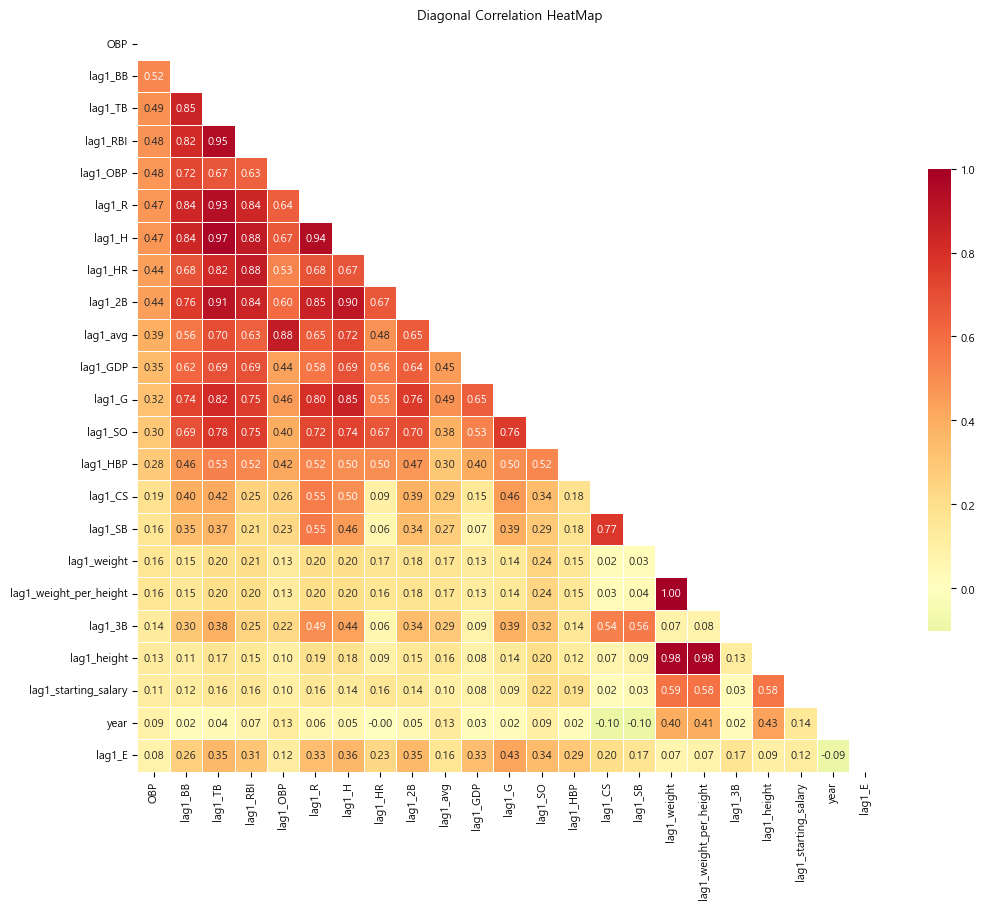

In [144]:
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12,12))
corr = regular_season_temp.select_dtypes(exclude=['object','bool']).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix,dtype='bool')
mask[np.triu_indices_from(mask)] = True
# mask
g = sns.heatmap(corr_matrix,cmap='RdYlGn_r',
                vmax=1,
                mask=mask,
                center=0,
                annot=True,
                fmt='.2f',
                square=True,
                linewidths=.5,cbar_kws={"shrink":.5})
plt.title('Diagonal Correlation HeatMap')

In [148]:
#희생 플라이 구하기
#OBP(출루율) 계산 공식 이용하여 SF(희생 플라이)계산 >> (H+BB+HBP)/OBP-(AB+BB+HBP)
regular_season_df['SF'] = regular_season_df[['H','BB','HBP']].sum(axis=1)/regular_season_df['OBP']-regular_season_df[['AB','BB','HBP']].sum(axis=1)
regular_season_df['SF'].fillna(0,inplace=True)
regular_season_df['SF'] = regular_season_df['SF'].apply(lambda x : round(x,0))
regular_season_df['SF']

0       6.0
1       0.0
2      -0.0
3       3.0
4       1.0
       ... 
2442    0.0
2443    0.0
2444    0.0
2445    1.0
2446   -0.0
Name: SF, Length: 2447, dtype: float64

In [149]:
#한 타수당 평균 희생 플라이 계산 후 필요한 것만 추출
regular_season_df['SF_1'] = regular_season_df['SF']/regular_season_df['AB']
regular_season_df_SF = regular_season_df[['batter_name','year','SF_1']]
regular_season_df_SF

,batter_name,year,SF_1
0,가르시아,2018,0.032787
1,강경학,2011,0.000000
2,강경학,2014,-0.000000
3,강경학,2015,0.009646
4,강경학,2016,0.009901
...,...,...,...
2442,황진수,2014,0.000000
2443,황진수,2015,0.000000
2444,황진수,2016,0.000000
2445,황진수,2017,0.008547


In [158]:
#day_by_day에서 연도별 선수의 시즌 전반기 출루율과 관련된 성적 합 구하기
sum_hf_yr_OBP = day_by_day_df.loc[day_by_day_df['date']<= 7.18].groupby(
    ['batter_name','year'])[['AB','H','BB','HBP']].sum().reset_index()
#day_by_day와 regular season에서 구한 희생 플라이 관련 데이터를 합치기
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df_SF,
                    how='left',
                    on=['batter_name','year'])
#선수별 전반기 희생 플라이 수 계산
sum_hf_yr_OBP['SF'] = (sum_hf_yr_OBP['SF_1'] * sum_hf_yr_OBP['AB']).apply(
        lambda x :round(x,0))
# sum_hf_yr_OBP
#선수별 전반기 OBP(출루율) 계산
sum_hf_yr_OBP['OBP'] = sum_hf_yr_OBP[['H','BB','HBP']].sum(axis=1) / sum_hf_yr_OBP[['AB','BB','HBP','SF']].sum(axis=1)
# OBP 결측치를 0으로 처리 
sum_hf_yr_OBP['OBP'].fillna(0,inplace=True)
# 분석에 필요하지 않은 열 제거
sum_hf_yr_OBP = sum_hf_yr_OBP[['batter_name','year','AB','OBP']]
sum_hf_yr_OBP

,batter_name,year,AB,OBP
0,가르시아,2018,85,0.418367
1,강경학,2011,1,0.000000
2,강경학,2014,0,1.000000
3,강경학,2015,156,0.342541
4,강경학,2016,81,0.222222
...,...,...,...,...
1381,황진수,2012,4,0.400000
1382,황진수,2013,0,0.000000
1383,황진수,2016,9,0.000000
1384,황진수,2017,71,0.316456


### 1.3.4. 추가 변수 생성

<a id='m5'>나이별 평균 성적</a>

In [ ]:
# 나이 변수 생성


In [ ]:
# 나이, 평균 출루율, 출루율 중위값으로 구성된 데이터프레임 구축


In [ ]:
# 나이에 따른 출루율 추이 시각화


In [ ]:
# 나이를 포함한 변수 선택


# 총 3년 전 성적까지 변수를 생성


### 1.3.5. 데이터 사후 처리

In [ ]:
# 결측치 비율 확인


In [ ]:
#1. 선수별 OBP 평균
# SF = (H+BB+HBP) / OBP-(AB+BB+HBP)
# OBP = (H+BB+HBP) / (AB+BB+HBP+SF)


In [ ]:
#2. 시즌별 OBP 평균


In [ ]:
#### player_OBP_mean(선수평균) 열 추가


In [ ]:
# 결측치 처리하는 함수 정의


In [ ]:
# 생성한 함수를 이용해 결측치 처리 진행


### 1.3.6. SLG 데이터 전처리

In [ ]:
# 상관관계를 탐색할 변수 선택


# 시간변수 생성 함수를 통한 지표별 1년 전 성적 추출

# 상관관계 도출


# 상관관계의 시각적 표현


# 대각 행렬을 기준으로 한쪽만 나타나게 설정해줍니다.



In [ ]:
# day_by_day에서 연도별 선수의 시즌 전반기 장타율(SLG)과 관련된 성적 합 구하기

# 전반기 장타율 계산

# SLG 결측치를 0으로 처리 

# 필요한 칼럼만 불러오고 나이 계산


In [ ]:
# 총 3년 전 성적까지 변수를 생성


In [ ]:
# 선수별 SLG 평균 데이터(player_SLG_mean)를 만듭니다


# 시즌별 SLG 평균 데이터(season_SLG_mean)를 만듭니다


# 선수 평균의 SLG(player_OBP_mean)를 새로운 변수로 더합니다.


# 선수 평균의 성적이 결측치이면 데이터에서 제거합니다.


# 결측치 처리



## 1.4. 모델링
### 1.4.1. 데이터 분할

In [ ]:
# 30타수 이상의 데이터만 학습


# 2018년 데이터를 test 데이터 2018년 이전은 train 데이터로 나눈다.




### 1.4.2. 모델 선택

In [ ]:


# log 단위(1e+01)로 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색한다. 


# GridSearchCV를 이용하여 dict에 Lasso, Ridege OBP 모델을 저장한다.


# GridSearchCV를 이용하여 dict에 Lasso, Ridge SLG 모델을 저장한다


In [ ]:


# 랜덤 포레스트의 parameter 범위를 정의한다.


# GridSearchCV를 이용하여 dict에 OBP Randomforest 모델을 저장한다.


# GridSearchCV를 이용하여 dict에 OBP Randomforest 모델을 저장한다.



In [ ]:
# 테스트 데이터셋(2018년)의 선수들의 OBP를 예측

# XGB_OBP = XGB_OBP_gridsearch.predict(OBP_test.iloc[:,-5:])

# test 데이터의 WRMSE 계산

# 막대그래프 위에 값을 표시해준다.


In [ ]:
# 테스트 데이터셋(2018년)의 선수들의 SLG를 예측


# test데이터 WRMSE 계산



### 1.4.3. 결과 해석과 평가

In [ ]:
# Lasso에서 GridSearchCV로 탐색한 최적의 alpha값 출력


## 1.5. 성능 향상을 위한 방법
### 1.5.1. 앙상블

### 1.5.2. 단순화된 모델 생성

### 1.5.3. 테스트 데이터 정제

### 1.5.4. 반발계수의 변화